<a href="https://colab.research.google.com/github/Sarayu2205/PRODIGY_ML_3/blob/main/PRODIGY_ML_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


100%|██████████| 2/2 [00:00<00:00,  7.99it/s]

✅ Model Accuracy: 100.00%



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


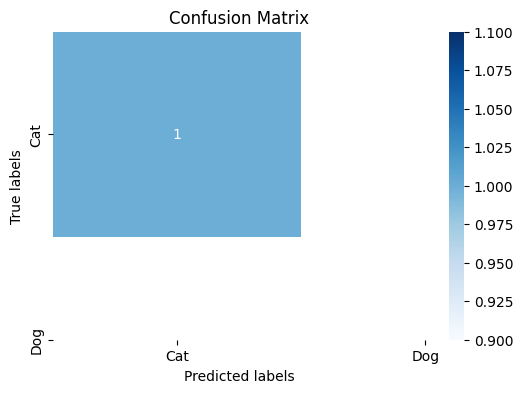

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from IPython.display import display
from google.colab import drive

# ✅ MOUNT GOOGLE DRIVE
drive.mount('/content/drive')

# ✅ UPDATE DATASET PATH (Make sure this matches your Google Drive structure)
dataset_path = "/content/drive/My Drive/cats_dogs_dataset"  # Change if needed
dogs_path = dataset_path + "/dogs"
cats_path = dataset_path + "/cats"

# ✅ CHECK IF FOLDERS EXIST
if not os.path.exists(dogs_path) or not os.path.exists(cats_path):
    raise FileNotFoundError("⚠️ Dataset folders not found! Check your Google Drive path.")

# Function to load images
def load_images(directory, label, img_size=(64, 64)):
    images, labels = [], []
    for filename in tqdm(os.listdir(directory)):
        filepath = os.path.join(directory, filename)
        img = cv2.imread(filepath)
        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img.flatten())  # Flatten the image
            labels.append(label)
    return images, labels

# ✅ LOAD IMAGES
dogs, dogs_labels = load_images(dogs_path, label=1)
cats, cats_labels = load_images(cats_path, label=0)

# Combine dataset
X = np.array(dogs + cats)
y = np.array(dogs_labels + cats_labels)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM Model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Make Predictions
y_pred = svm_model.predict(X_test)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")

# ✅ FIXED: Confusion Matrix (Now it will show only once)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

# ✅ Removed display(plt.gcf()) to avoid double output
plt.show()

